<a href="https://colab.research.google.com/github/pndang/Project_WHEL/blob/main/Project_WHEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Phu Dang
# Date: 01.20.2023
# Mentor: Professor Niema Moshiri, Niema Lab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Loading dataset

# Health Status at baseline
hs = pd.read_excel("/content/drive/MyDrive/NIEMA_Lab/Health_Status.xls")

# Data cleaning, preprocessing & EDA

In [ ]:
hs.head(10)

,ID,hospital_,Exam_Freq,Proph_Mast,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Misc_Cond,Blood_Sugar_Meds,Cardio_Meds,Gastro_Meds,Corticosteroids_
0,13245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13244,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13241,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,13240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,13239,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7,13238,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,13237,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,13236,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = hs['Cardiovascular']
print(len(x))
x = [i for i in x if not math.isnan(i)]

3088


In [ ]:
len(x)

2543

In [ ]:
np.unique(x)

array([0., 1.])

In [ ]:
cols = [i for i in hs.columns if i not in ['ID', 'hospital_', 'Exam_Freq']]
cols 

['Proph_Mast',
 'Blood_Sugar',
 'Cardiovascular',
 'Digestive',
 'Arthritis',
 'Osteoporosis',
 'Misc_Cond',
 'Blood_Sugar_Meds',
 'Cardio_Meds',
 'Gastro_Meds',
 'Corticosteroids_']

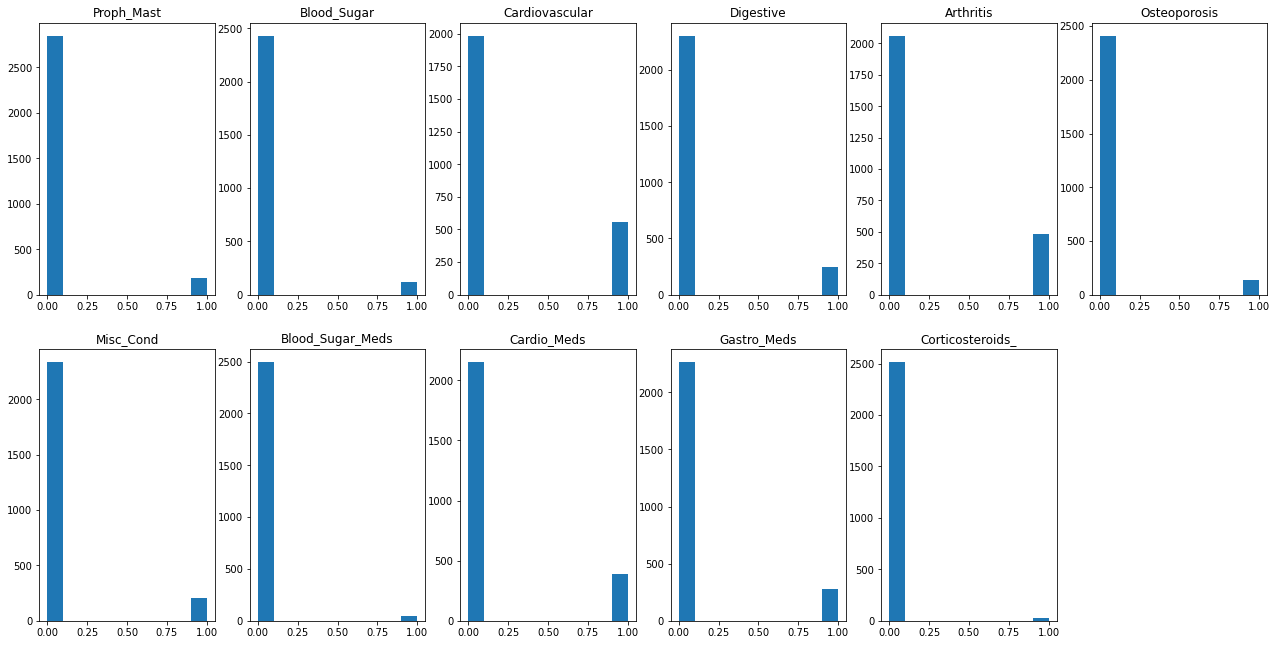

In [40]:
index = 1
plt.figure(figsize=(22, 11))
for col in cols:
  plt.subplot(2, 6, index)
  values = [i for i in hs[col] if not math.isnan(i)]
  plt.hist(values)
  plt.title(col)
  index += 1